## Feature Scaling

We discussed previously that the scale of the features is an important consideration when building machine learning models. Briefly:


### Feature magnitude matters because:

- The regression coefficients of linear models are directly influenced by the scale of the variable.
- Variables with bigger magnitude / larger value range dominate over those with smaller magnitude / value range
- Gradient descent converges faster when features are on similar scales
- Feature scaling helps decrease the time to find support vectors for SVMs
- Euclidean distances are sensitive to feature magnitude.
- Some algorithms, like PCA require the features to be centered at 0.


### The machine learning models affected by the feature scale are:

- Linear and Logistic Regression
- Neural Networks
- Support Vector Machines
- KNN
- K-means clustering
- Linear Discriminant Analysis (LDA)
- Principal Component Analysis (PCA)


### Feature Scaling

**Feature scaling** refers to the methods or techniques used to normalize the range of independent variables in our data, or in other words, the methods to set the feature value range within a similar scale. Feature scaling is generally the last step in the data preprocessing pipeline, performed **just before training the machine learning algorithms**.

There are several Feature Scaling techniques, which we will discuss throughout this section:

- Standardisation
- Mean normalisation
- Scaling to minimum and maximum values - MinMaxScaling
- Scaling to maximum value - MaxAbsScaling
- Scaling to quantiles and median - RobustScaling
- Normalization to vector unit length

In this notebook, we will discuss **Scaling to vector unit  length**.

=================================================================

## Scaling to vector unit  length / unit norm

In this procedure we scale the components of a feature vector such that the complete vector has a length of 1 or, in other words a norm of 1. **Note** that this normalisation procedure normalises the **feature** vector, and not the **observation** vector. So we divide by the norm of the feature vector, observation per observation, across the different variables, and not by the norm of the **observation** vector, across observations for the same feature.

First, let me give you the formulas, and then I illustrate with an example.

### Scaling to unit norm, formulas

Scaling to unit norm is achieved by dividing each feature vector by either the Manhattan distance (l1 norm) or the Euclidean distance of the vector (l2 norm):

X_scaled_l1 = X / l1(X)

X_scaled_l2 = X / l2(X)


The **Manhattan distance** is given by the sum of the absolute components of the vector:

l1(X) = |x1| + |x2| + ... + |xn|


Whereas the **Euclidean distance** is given by the square root of the square sum of the component of the vector:

l2(X) = sqr( x1^2 + x2^2 + ... + xn^2 )


In the above example, x1 is variable 1, x2 variable 2, and xn variable n, and X is the data for 1 observation across variables (a row in other words).

**Note** as well that as the euclidean distance squares the values of the feature vector components, outliers have a heavier weight. With outliers, we may prefer to use l1 normalisation.


### Scaling to unit norm, examples

For example, if our data has 1 observations (1 row) and 3 variables:

- number of pets
- number of children
- age

The values for each variable for that single observation are 10, 15 and 20. Our vector X = [10, 15, 20]. Then:

l1(X) = 10 + 15 + 20 = 45

l2(X) = sqr( 10^2 + 15^2 + 20^2) = sqr( 100 + 225 + 400) = **26.9**

The euclidean distance is always smaller than the manhattan distance.


The normalised vector values are therefore:

X_scaled_l1 = [ 10/45, 15/45, 20/45 ]      =  [0.22, 0.33, 0.44]

X_scaled_l2 = [10/26.9, 15/26.9, 20/26.9 ] =  [0.37, 0.55, 0.74]


Scikit-learn recommends this scaling procedures for text classification or clustering. For example, they quote the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.


## In this demo

We will perform scaling to unit length using Scikit-learn

3.DATASET
The dataset for this paper has been obtained 
from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Automobile).

This data set consists of three types of entities: (a) the specification of an auto in terms of various 
characteristics, (b)its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars.

The second rating corresponds to the degree to which the auto is more risky than its price indicates.
Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky 
(or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process 
“symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized 
for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…),
and represents the average loss per car per year.

There are total 205 instances and 26 attributes out of which 15 are continuous, 1 is integer and 
10 are nominal. There are missing values as well.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

# the scaler - for robust scaling
from sklearn.preprocessing import Normalizer

In [2]:
# let's load the imports-85-clean-data.csv dataset

data = pd.read_csv('C:\\Users\\gusal\\machine learning\\Feature engineering\\automobile data set\\imports-85-clean-data.csv')


In [3]:
# let's have a look at the main statistical parameters of the variables
# to get an idea of the feature magnitudes

data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,128.576317,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,104.848780,5125.369458,25.219512,30.751220,13321.278623
std,1.245307,38.606463,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,39.969861,476.979093,6.542142,6.886443,8095.996440
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,95.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,125.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


When scaling to unit length, as we do it across the variables and observation per observation, the distance does vary for each observation. Therefore, we do not need to learn parameters and store them. The scaling occurs on an observation per observation level. Therefore, in essence, we do not need to divide into train and test.

However, you probably did this to implement other feature engineering steps, so let's continue doing so here as well.

In [4]:
inputs = data.drop(['price'], axis = 1)
target = data.price

In [5]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((143, 25), (62, 25))

# we need to identify the numerical variables that can be Scaled

In [6]:
# find numerical variables
#those different from object and also excluding the target Price
features_numerical = [c for c in data.columns if data[c].dtypes!='O' and c !='price']

In [7]:
features_numerical

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [8]:
X_train_temp = X_train[features_numerical]
X_test_temp = X_test[features_numerical]


### Scaling to l1

In [9]:
# set up the scaler
scaler = Normalizer(norm='l1')

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train_temp)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_temp)
X_test_scaled = scaler.transform(X_test_temp)

In [10]:
# let's calculate the norm for each observation (feature vector)
# original data

np.round( np.linalg.norm(X_train_temp, ord=1, axis=1), 1)

array([ 8917.2,  8003. ,  9139.2,  9214.4,  8199. ,  7995.7,  8617.2,
        7972.8,  7685.4,  7811.6,  7618.7,  7226.9,  7708.9,  8318.9,
        7921.9,  8875.8,  7833.2,  8506.4,  9174. ,  8258.6,  8473.4,
        8263.9,  8218.8,  9679.1,  8527.5,  9123.7,  9192.7,  7655.4,
        8003. ,  8702.2,  7991.2,  8291.6,  8684. ,  7902.8,  9062.2,
        9106.2,  9536.6,  9179.9,  7836.6,  7488.6,  8002.4,  8681.5,
        7959.8,  8155.2,  7632.6,  9095.1,  7600.7,  8353.9,  7907.9,
        8318.9,  7984. ,  8018. ,  7930. ,  9019.9,  8739.1, 10142.9,
        9879.9,  8159. ,  9393.6,  7949.6,  7782.2,  8380.6,  8622.7,
        9202.9,  8015.6,  9681.1,  8277.8,  8291.8,  9729.5,  8868.7,
        9233.7,  9005.6,  8826. ,  8262.2,  7629.4,  7578.6,  7510.5,
        7874.9,  7368. ,  9060.2,  8381.6,  9399.3,  8745.9,  9144.2,
        8509.3,  8353.9,  8230. ,  7799. ,  8565.4,  9351.1,  8765.2,
        7411. ,  9972.2,  8849.2,  8755.2,  7680.4,  7525.3,  9723.1,
        8665.8,  832

In [11]:
# let's calculate the norm for each observation (feature vector)
# scaled data

np.round( np.linalg.norm(X_train_scaled, ord=1, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

Now, each feature vector has a l1 norm of 1.

In [12]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_temp.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_temp.columns)

In [13]:
# let's look at the individual values of the variables in the original data
X_train_temp.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.713287,126.196311,98.998601,174.504895,65.882517,53.818881,2578.181818,127.832168,3.336643,3.271538,10.408531,104.013986,5117.132867,25.020979,30.440559
std,1.253853,38.695601,6.258976,12.052101,2.064090,2.525753,528.853951,42.208568,0.268194,0.288223,4.324095,38.091067,509.421962,6.004070,6.387292
min,-2.000000,65.000000,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.680000,2.640000,7.000000,52.000000,4150.000000,13.000000,16.000000
25%,0.000000,95.000000,94.500000,167.050000,64.100000,52.000000,2190.500000,97.500000,3.140000,3.150000,8.600000,73.000000,4800.000000,20.000000,25.000000
50%,0.000000,119.000000,96.900000,173.200000,65.400000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.000000
75%,1.500000,153.000000,102.400000,184.600000,66.900000,55.600000,2975.500000,145.500000,3.590000,3.435000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,256.000000,120.900000,208.100000,71.700000,59.800000,4066.000000,326.000000,3.800000,4.170000,23.000000,262.000000,6600.000000,38.000000,47.000000


In [14]:
# let's look at the individual values of the variables in the original data
X_train_scaled.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.000084,0.014767,0.011670,0.020550,0.007770,0.006356,0.301294,0.014871,0.000393,0.000386,0.001236,0.012012,0.601939,0.002996,0.003638
std,0.000144,0.004220,0.000921,0.001478,0.000524,0.000577,0.048149,0.004013,0.000036,0.000041,0.000549,0.003549,0.053346,0.000895,0.000982
min,-0.000218,0.007993,0.009205,0.016900,0.006578,0.004713,0.212589,0.007655,0.000308,0.000272,0.000726,0.006636,0.471869,0.001282,0.001676
25%,0.000000,0.011579,0.011051,0.019632,0.007380,0.005986,0.262552,0.012191,0.000365,0.000350,0.000980,0.009060,0.571326,0.002210,0.002801
50%,0.000000,0.014370,0.011691,0.020567,0.007752,0.006282,0.300758,0.014010,0.000396,0.000396,0.001073,0.011168,0.602826,0.002920,0.003602
75%,0.000175,0.017298,0.012337,0.021697,0.008127,0.006852,0.327854,0.016733,0.000413,0.000415,0.001179,0.013631,0.647048,0.003692,0.004352
max,0.000368,0.031988,0.013900,0.023836,0.009027,0.007594,0.416947,0.032297,0.000501,0.000481,0.003035,0.025831,0.701228,0.005050,0.006246


The values have been squeezed in a smaller value range.

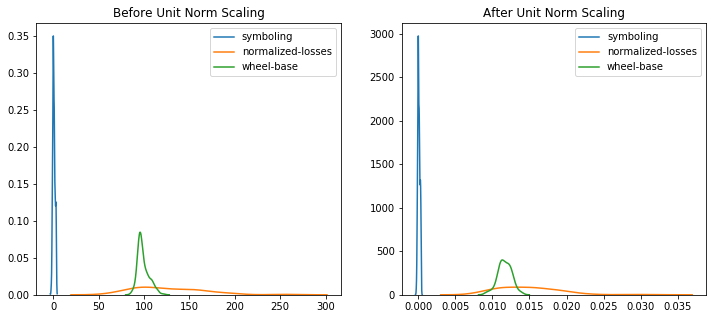

In [15]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Unit Norm Scaling')
sns.kdeplot(X_train_temp['symboling'], ax=ax1)
sns.kdeplot(X_train_temp['normalized-losses'], ax=ax1)
sns.kdeplot(X_train_temp['wheel-base'], ax=ax1)

# after scaling
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['symboling'], ax=ax2)
sns.kdeplot(X_train_scaled['normalized-losses'], ax=ax2)
sns.kdeplot(X_train_scaled['wheel-base'], ax=ax2)
plt.show()

In [16]:
X_train_scaled.columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg'],
      dtype='object')

As we can see the main effect of mean normalisation was to center all the distributions at zero, and the values vary between -1 and 1.

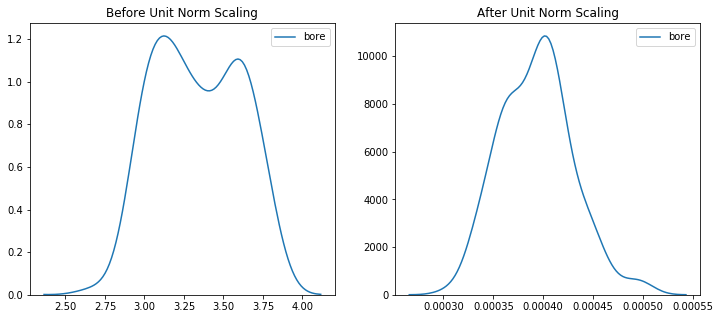

In [17]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Unit Norm Scaling')
sns.kdeplot(X_train_temp['bore'], ax=ax1)
#sns.kdeplot(X_train_temp['stroke'], ax=ax1)
#sns.kdeplot(X_train_temp['city-mpg'], ax=ax1)

# after scaling
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['bore'], ax=ax2)
#sns.kdeplot(X_train_scaled['stroke'], ax=ax2)
#sns.kdeplot(X_train_scaled['city-mpg'], ax=ax2)
plt.show()

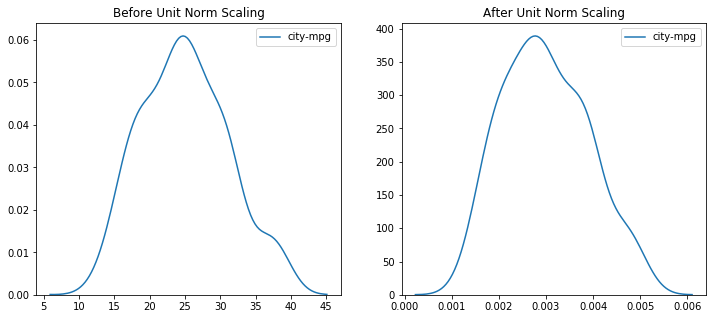

In [18]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Unit Norm Scaling')
#sns.kdeplot(X_train_temp['bore'], ax=ax1)
#sns.kdeplot(X_train_temp['stroke'], ax=ax1)
sns.kdeplot(X_train_temp['city-mpg'], ax=ax1)

# after scaling
ax2.set_title('After Unit Norm Scaling')
#sns.kdeplot(X_train_scaled['bore'], ax=ax2)
#sns.kdeplot(X_train_scaled['stroke'], ax=ax2)
sns.kdeplot(X_train_scaled['city-mpg'], ax=ax2)
plt.show()

See how this normalisation changes the distribution of the original variable quite dramatically. 

Adding the categorical variables to X_train_scaled and X_test_scaled

In [19]:
# find categorical variables
# those of type 'Object' in the dataset
features_categorical = [c for c in X_train.columns if data[c].dtypes=='O']

In [20]:
features_categorical

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

In [21]:
X_train_scaled = X_train_scaled.set_index(X_train.index)

In [22]:
X_train_scaled[features_categorical] = X_train[features_categorical]

In [23]:
X_train_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
40,0.000000,0.009532,0.010822,0.019670,0.007009,0.006067,0.266002,0.012336,0.000353,0.000401,...,honda,gas,std,four,sedan,fwd,front,ohc,four,1bbl
60,0.000000,0.014370,0.012345,0.022217,0.008309,0.006935,0.301138,0.015244,0.000424,0.000424,...,mazda,gas,std,four,sedan,fwd,front,ohc,four,2bbl
56,0.000328,0.016413,0.010428,0.018492,0.007189,0.005427,0.260416,0.007659,0.000337,0.000345,...,mazda,gas,std,two,hatchback,rwd,front,rotor,two,4bbl
101,0.000000,0.013891,0.010896,0.019719,0.007217,0.005980,0.335887,0.019643,0.000372,0.000355,...,nissan,gas,std,four,sedan,fwd,front,ohcv,six,mpfi
86,0.000122,0.015246,0.011745,0.021027,0.007977,0.006293,0.293328,0.014880,0.000409,0.000422,...,mitsubishi,gas,std,four,sedan,fwd,front,ohc,four,2bbl


In [24]:
X_test_scaled = X_test_scaled.set_index(X_test.index)

In [25]:
X_test_scaled[features_categorical] = X_test[features_categorical]

In [26]:
X_test_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
52,0.000131,0.013642,0.012212,0.020869,0.008421,0.007096,0.249879,0.011936,0.000397,0.000413,...,mazda,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
181,-0.000108,0.009750,0.011321,0.020345,0.007204,0.005861,0.341360,0.017442,0.000354,0.000363,...,toyota,gas,std,four,wagon,rwd,front,dohc,six,mpfi
5,0.000225,0.018480,0.011246,0.019978,0.007471,0.005983,0.282492,0.015325,0.000359,0.000383,...,audi,gas,std,two,sedan,fwd,front,ohc,five,mpfi
18,0.000275,0.016624,0.012145,0.019386,0.008285,0.007309,0.204439,0.008381,0.000400,0.000416,...,chevrolet,gas,std,two,hatchback,fwd,front,l,three,2bbl
188,0.000233,0.010969,0.011354,0.020035,0.007643,0.006500,0.268385,0.012719,0.000372,0.000397,...,volkswagen,gas,std,four,sedan,fwd,front,ohc,four,mpfi


### Scaling to l2

In [27]:
inputs = data.drop(['price'], axis = 1)
target = data.price

In [28]:
# let's separate the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=42)

X_train.shape, X_test.shape

((143, 25), (62, 25))

In [29]:
# we need to identify the numerical variables that can be Standardized

In [30]:
# find numerical variables
#those different from object and also excluding the target Price
features_numerical = [c for c in data.columns if data[c].dtypes!='O' and c !='price']

In [31]:
features_numerical

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [32]:
X_train_temp = X_train[features_numerical]
X_test_temp = X_test[features_numerical]


In [33]:
# set up the scaler
scaler = Normalizer(norm='l2')

# fit the scaler, this procedure does NOTHING
scaler.fit(X_train_temp)

# transform train and test sets
X_train_scaled = scaler.transform(X_train_temp)
X_test_scaled = scaler.transform(X_test_temp)

In [34]:
# let's calculate the norm for each observation (feature vector)
# original data

np.round( np.linalg.norm(X_train_temp, ord=2, axis=1), 1)

array([4874.4, 5795.3, 5145.2, 6275.3, 5053.1, 6333.4, 6171.8, 5965.6,
       5238.3, 6184.7, 4944.1, 5355.1, 5991.8, 6996.2, 6308.3, 5748.7,
       5860.7, 5903.8, 5855.2, 6201.6, 6162.2, 6424.7, 5751.4, 5840.5,
       5706.2, 5927.4, 6524.2, 5538.9, 5317.5, 6337.2, 5430.3, 5368.2,
       5817.1, 5938. , 5199.4, 6311. , 6283.7, 6006.7, 5275.8, 6200.9,
       5927.4, 6524.2, 6154.1, 5264.8, 6191.4, 5804. , 5961.9, 5069.6,
       5878.8, 5382.4, 6283.7, 5379. , 5830.9, 5200.4, 5506.3, 5619.8,
       5313.9, 5703. , 5766.9, 5786.9, 5385.8, 5722.3, 6984.7, 5613.5,
       6272.3, 5249.6, 5612.9, 5903.7, 5725.4, 5950. , 5523.9, 6246.9,
       5656.2, 6266.9, 5560.8, 5049.3, 5346.3, 4922.7, 5984.2, 6086.8,
       5371.7, 5909. , 5703.7, 5254.7, 5942.5, 6391.7, 5996.9, 6315.9,
       6252.1, 5395.2, 5549.3, 5800.7, 6089.5, 5728.4, 5539.4, 6316. ,
       5082.8, 5368.2, 4852.4, 5694.8, 6451.2, 6024.2, 6079.4, 5915.5,
       5523.4, 5949. , 5260.7, 5373.5, 5850.3, 5351.5, 6123.5, 5445.1,
      

In [35]:
# let's calculate the norm for each observation (feature vector)
# scaledl data

np.round( np.linalg.norm(X_train_scaled, ord=2, axis=1), 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [36]:
# let's transform the returned NumPy arrays to dataframes for the rest of
# the demo

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_temp.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_temp.columns)

In [37]:
X_train_temp.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.846154,128.739375,98.930070,174.655245,65.988811,53.791608,2573.237762,127.013986,3.317063,3.256084,9.983986,106.748252,5154.900272,24.818182,30.321678
std,1.235095,38.911182,6.073737,12.407288,2.181939,2.480075,522.368306,41.436526,0.273807,0.307695,3.745026,40.897238,487.161074,5.915647,6.232131
min,-2.000000,65.000000,86.600000,144.600000,61.800000,47.800000,1819.000000,70.000000,2.540000,2.070000,7.000000,52.000000,4150.000000,13.000000,16.000000
25%,0.000000,95.000000,94.500000,166.800000,64.200000,52.000000,2190.500000,98.000000,3.140000,3.115000,8.550000,74.500000,4800.000000,19.000000,25.000000
50%,1.000000,125.000000,97.200000,173.400000,65.500000,54.100000,2443.000000,120.000000,3.310000,3.270000,9.000000,97.000000,5200.000000,24.000000,30.000000
75%,2.000000,154.000000,102.200000,184.600000,66.900000,55.700000,2953.000000,141.000000,3.540000,3.405000,9.400000,118.500000,5500.000000,30.000000,34.000000
max,3.000000,256.000000,115.600000,202.600000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,38.000000,47.000000


In [38]:
X_train_scaled.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.000145,0.022194,0.017153,0.030268,0.011439,0.009335,0.444401,0.021905,0.000575,0.000564,0.001748,0.018248,0.888925,0.004342,0.005297
std,0.000210,0.006526,0.001584,0.002827,0.000842,0.000873,0.085391,0.006673,0.000063,0.000066,0.000751,0.006202,0.046590,0.001221,0.001317
min,-0.000336,0.011925,0.013507,0.023043,0.009148,0.007478,0.289867,0.010831,0.000429,0.000350,0.001090,0.009786,0.754306,0.002034,0.002660
25%,0.000000,0.017316,0.016049,0.028435,0.010920,0.008664,0.379985,0.017524,0.000528,0.000530,0.001435,0.013342,0.865499,0.003284,0.004182
50%,0.000168,0.021958,0.017029,0.030405,0.011406,0.009266,0.448722,0.020477,0.000573,0.000568,0.001565,0.016580,0.891794,0.004243,0.005283
75%,0.000335,0.025317,0.018241,0.031833,0.011968,0.010005,0.497703,0.024312,0.000616,0.000604,0.001686,0.021185,0.923697,0.005297,0.006412
max,0.000543,0.049236,0.021167,0.036866,0.013705,0.011314,0.653732,0.051938,0.000735,0.000730,0.004537,0.043124,0.956130,0.007298,0.008963


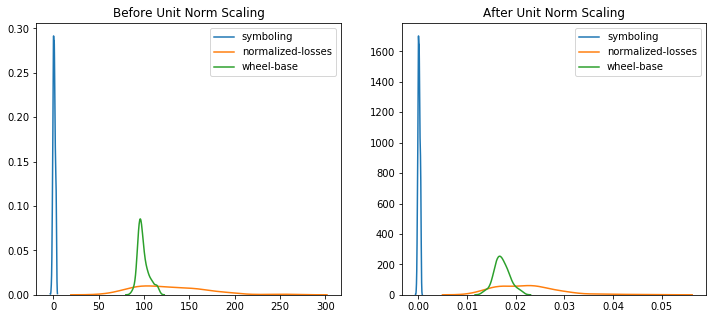

In [39]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Unit Norm Scaling')
sns.kdeplot(X_train_temp['symboling'], ax=ax1)
sns.kdeplot(X_train_temp['normalized-losses'], ax=ax1)
sns.kdeplot(X_train_temp['wheel-base'], ax=ax1)

# after scaling
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['symboling'], ax=ax2)
sns.kdeplot(X_train_scaled['normalized-losses'], ax=ax2)
sns.kdeplot(X_train_scaled['wheel-base'], ax=ax2)
plt.show()

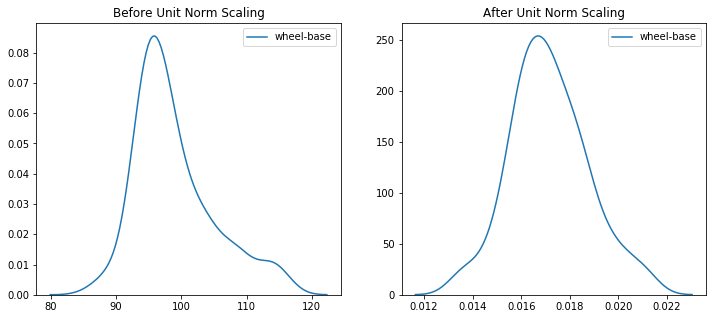

In [40]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Unit Norm Scaling')
#sns.kdeplot(X_train_temp['symboling'], ax=ax1)
#sns.kdeplot(X_train_temp['normalized-losses'], ax=ax1)
sns.kdeplot(X_train_temp['wheel-base'], ax=ax1)

# after scaling
ax2.set_title('After Unit Norm Scaling')
#sns.kdeplot(X_train_scaled['symboling'], ax=ax2)
#sns.kdeplot(X_train_scaled['normalized-losses'], ax=ax2)
sns.kdeplot(X_train_scaled['wheel-base'], ax=ax2)
plt.show()

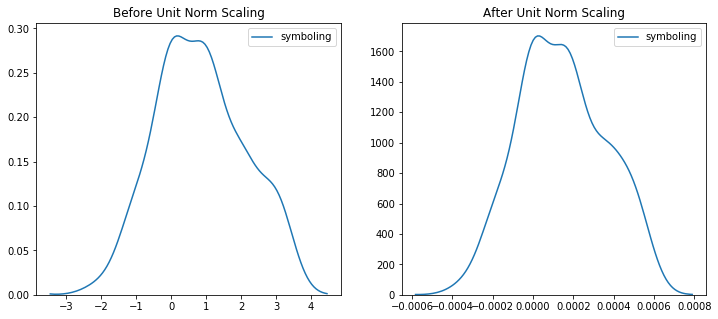

In [41]:
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Unit Norm Scaling')
sns.kdeplot(X_train_temp['symboling'], ax=ax1)
#sns.kdeplot(X_train_temp['normalized-losses'], ax=ax1)
#sns.kdeplot(X_train_temp['wheel-base'], ax=ax1)

# after scaling
ax2.set_title('After Unit Norm Scaling')
sns.kdeplot(X_train_scaled['symboling'], ax=ax2)
#sns.kdeplot(X_train_scaled['normalized-losses'], ax=ax2)
#sns.kdeplot(X_train_scaled['wheel-base'], ax=ax2)
plt.show()

Adding the categorical variables to X_train_scaled and X_test_scaled

In [42]:
# find categorical variables
# those of type 'Object' in the dataset
features_categorical = [c for c in X_train.columns if data[c].dtypes=='O']

In [43]:
X_train_scaled = X_train_scaled.set_index(X_train.index)

In [44]:
X_train_scaled[features_categorical] = X_train[features_categorical]

In [45]:
X_train_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
177,-0.000205,0.013335,0.021008,0.036025,0.013643,0.011058,0.504267,0.025029,0.000679,0.000726,...,toyota,gas,std,four,hatchback,fwd,front,ohc,four,mpfi
75,0.000173,0.022158,0.017721,0.030783,0.011734,0.009456,0.502128,0.024157,0.000652,0.000538,...,mercury,gas,turbo,two,hatchback,rwd,front,ohc,four,mpfi
174,-0.000194,0.012633,0.019902,0.034129,0.012925,0.010670,0.482000,0.021379,0.000636,0.000651,...,toyota,diesel,turbo,four,sedan,fwd,front,ohc,four,idi
31,0.000319,0.021832,0.013800,0.023043,0.010183,0.008095,0.289867,0.014661,0.000464,0.000543,...,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
12,0.000000,0.037205,0.020027,0.034989,0.012824,0.010746,0.536308,0.032456,0.000655,0.000631,...,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi


In [46]:
X_test_scaled = X_test_scaled.set_index(X_test.index)

In [47]:
X_test_scaled[features_categorical] = X_test[features_categorical]

In [48]:
X_test_scaled.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
15,0.000000,0.030449,0.016414,0.029973,0.010610,0.008833,0.512238,0.033145,0.000574,0.000538,...,bmw,gas,std,four,sedan,rwd,front,ohc,six,mpfi
9,0.000000,0.025080,0.015794,0.028286,0.010778,0.008254,0.484613,0.020794,0.000497,0.000540,...,audi,gas,turbo,two,hatchback,4wd,front,ohc,five,mpfi
100,0.000000,0.018616,0.017070,0.030452,0.011450,0.009606,0.404277,0.021074,0.000585,0.000609,...,nissan,gas,std,four,sedan,fwd,front,ohc,four,2bbl
132,0.000509,0.025453,0.016816,0.031663,0.011284,0.009519,0.451025,0.020532,0.000601,0.000521,...,saab,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
68,-0.000174,0.016165,0.019119,0.033181,0.012219,0.010203,0.651797,0.031808,0.000622,0.000633,...,mercedes-benz,diesel,turbo,four,wagon,rwd,front,ohc,five,idi
